<a href="https://colab.research.google.com/github/Flaviofrc97/DATA-SCIENSE-PROJECTS/blob/main/Employees_Evaluation_for_Promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data source: https://www.kaggle.com/muhammadimran112233/employees-evaluation-for-promotion

• **employeeid:** Unique ID for the employee • department: Department of employee 

• **region:** Region of employment (unordered)

 • **education:** Education Level 

• **gender:** Gender of Employee • recruitmentchannel: Channel of recruitment for employee

• **no_ of_ trainings:** no of other trainings completed in the previous year on soft skills, technical skills, etc.

• **age:** Age of Employee

• **previous_ year_ rating:** Employee Rating for the previous year

• **length_ of_ service:** Length of service in years

• **awards_ won:** if awards won during the previous year then 1 else 0

• **avg_ training_ score:** Average score in current training evaluations

• **is_promoted:** (Target) Recommended for promotion

# **0.0. IMPORTS**

In [ ]:
#!pip install category_encoders

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.base import clone

#chart
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
import scipy.stats as ss

import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error


#Classifiers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings( 'ignore' )

sns.set(style='darkgrid')

# **1.0. LOADING DATA**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasests/Employee promotion/employee_promotion.csv')

In [ ]:
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0


#**2.0. DATA DESCRIPTION**

In [ ]:
print(f'number of rows {df.shape[0]}')
print(f'number of cols {df.shape[1]}')

number of rows 54808
number of cols 13


In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


# **3.0. DATA PREPROCESSING**

In [ ]:
df1 = df.copy()

In [ ]:
(df1.isna().sum() / len(df1)) * 100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won              0.000000
avg_training_score      4.670851
is_promoted             0.000000
dtype: float64

### **3.0.1. Fill NA**

In [ ]:
# I choose fill with the median to fill numerical variables
df1.age.fillna(df1['age'].median(), inplace=True )

df1.previous_year_rating.fillna(df1['previous_year_rating'].median(),  inplace=True )

df1.avg_training_score.fillna(df1['avg_training_score'].median(), inplace=True )

# # I will use the value more often to fill ​​categorical variables

#df1['education'].value_counts()
df1.education.fillna("Bachelor's", inplace=True )

#drop employee_id because is a unique value to each one employee

df1.drop('employee_id', axis=1, inplace=True)

#Transform genter to binary value
df1['gender'] = df1['gender'].map({'f': 0, 'm': 1}).astype(int)

### **3.1.2 Split Numerical and Categorical**

In [ ]:
df_num = df1.select_dtypes(include=['int64', 'float64'])
df_cat = df1.select_dtypes(exclude=['int64', 'float64'])

##**HIPHTOSYS**

- **H1 Funcionario com mais tempo de serviço de mais chances de ser promovido**
- **H2 Funcionarios com maior escolaridade tem mais chances de ser promovidos**

- **H3 Funcionarios com mais vellhores recebem mais promoção**

- **h4 - Quando menor as notas nas avaliações, menos chances tem de ser promovidos**



# **4.0. EXPLORATORY DATA ANALYSIS**

## **4.1. UNIVARIATED ANALYSIS**

### **4.0.0. Target Variable**

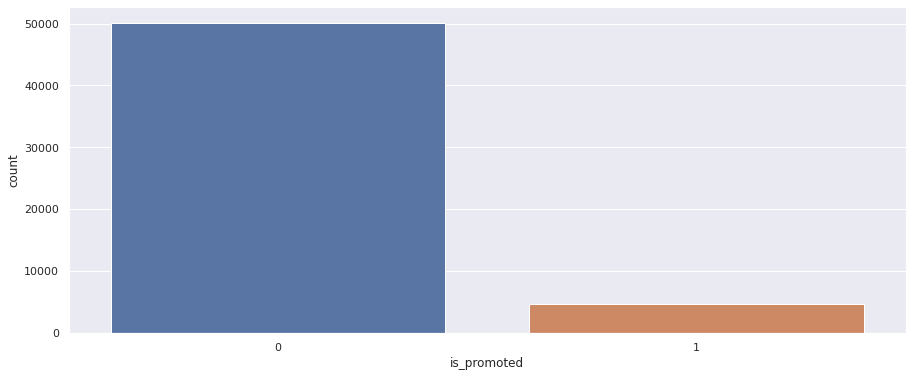

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='is_promoted', data=df1);

**the class is unbalanced**

### **4.1.2 Numerical Variable**

In [ ]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( df_num.apply( np.mean ) ).T
ct2 = pd.DataFrame( df_num.apply( np.median ) ).T
# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( df_num.apply( np.std ) ).T
d2 = pd.DataFrame( df_num.apply( min ) ).T
d3 = pd.DataFrame( df_num.apply( max ) ).T
d4 = pd.DataFrame( df_num.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( df_num.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( df_num.apply( lambda x: x.kurtosis() ) ).T

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,gender,0.0,1.0,1.0,0.702379,1.0,0.457212,-0.885300,-1.216289
1,no_of_trainings,1.0,10.0,9.0,1.253011,1.0,0.609258,3.445434,18.740082
2,age,20.0,60.0,40.0,34.803915,33.0,7.660099,1.007432,0.792353
3,previous_year_rating,1.0,5.0,4.0,3.304481,3.0,1.214759,-0.260858,-0.592811
4,length_of_service,1.0,37.0,36.0,5.865512,5.0,4.265055,1.738061,4.414031
5,awards_won,0.0,1.0,1.0,0.023172,0.0,0.150449,6.338914,38.183220
6,avg_training_score,39.0,99.0,60.0,63.538845,60.0,13.225432,0.465344,-1.030538
7,is_promoted,0.0,1.0,1.0,0.085170,0.0,0.279135,2.972339,6.835049


<function matplotlib.pyplot.tight_layout>

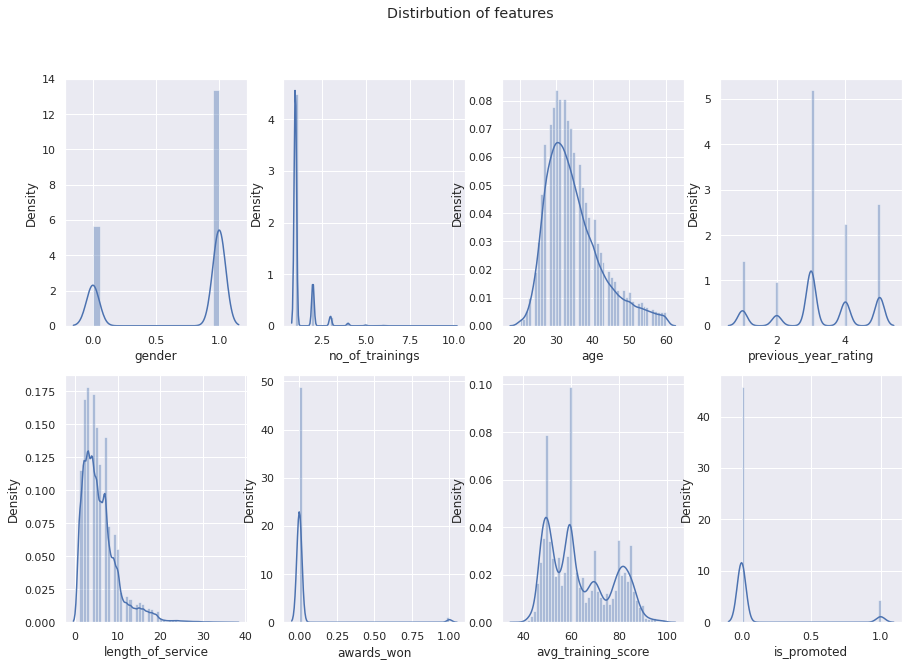

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for i, feature in enumerate(df_num):
    row = int(i/4)
    col = i%4
    sns.distplot(df_num.iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout


**As we can see, the columns age, length_of_service and avg_training_score doesnt have a normal curve. So, after i will use log to do a normalization.**

### **4.1.3 Categorical Variable**

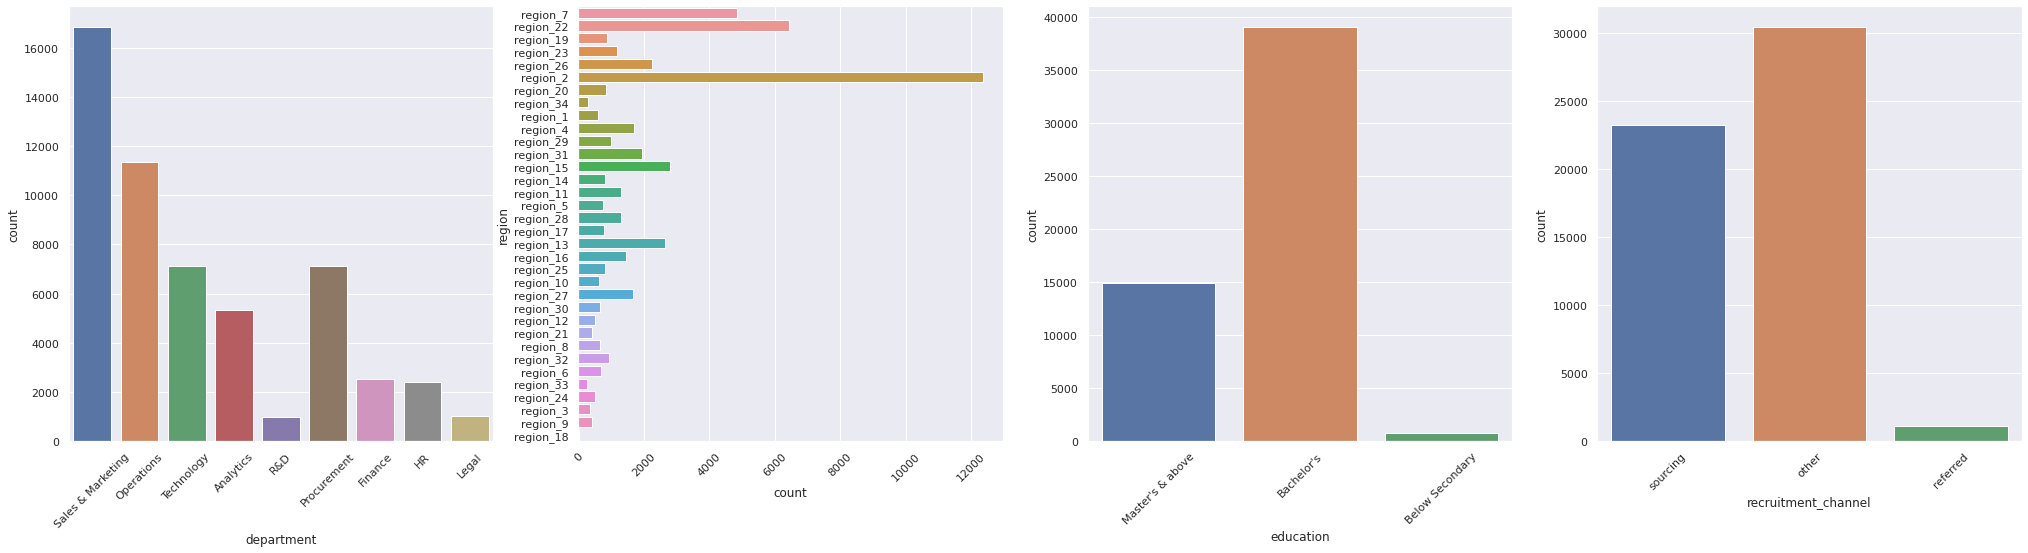

In [ ]:
plt.figure(figsize=(35,8));
plt.subplot( 1, 4, 1 );
sns.countplot(x='department', data=df_cat);
plt.xticks(rotation=45);

plt.subplot( 1, 4, 2 );
sns.countplot( y='region',  data=df_cat);
plt.xticks(rotation=45);

plt.subplot( 1, 4, 3 );
sns.countplot( x='education', data=df_cat);
plt.xticks(rotation=45);

plt.subplot( 1, 4, 4 );
sns.countplot( x='recruitment_channel', data=df_cat);
plt.xticks(rotation=45);

### **4.1.4 Bivariate Analysis**

In [ ]:
df1.sample()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
25567,Technology,region_2,Bachelor's,1,other,2,25,3.0,1,0,76.0,0


**H1 Funcionario com mais tempo de serviço têm mais chances de ser promovido**

FALSE

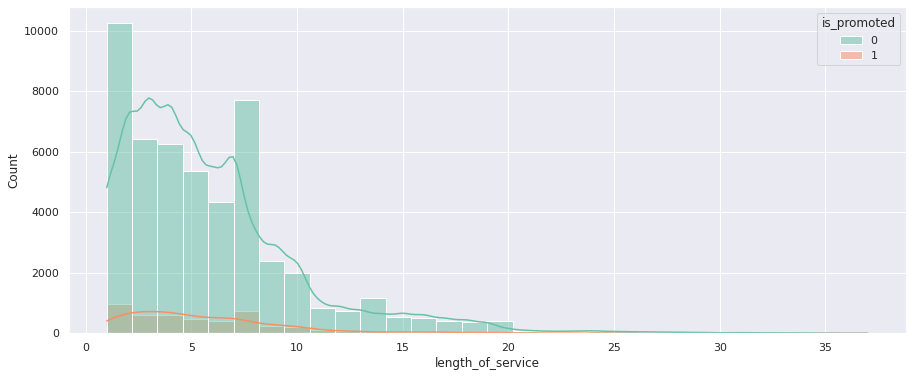

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(x='length_of_service', hue='is_promoted', data=df1, palette='Set2', bins=30, kde=True);

**H2 Funcionarios com maior escolaridade tem mais chances de ser promovidos**

TRUE

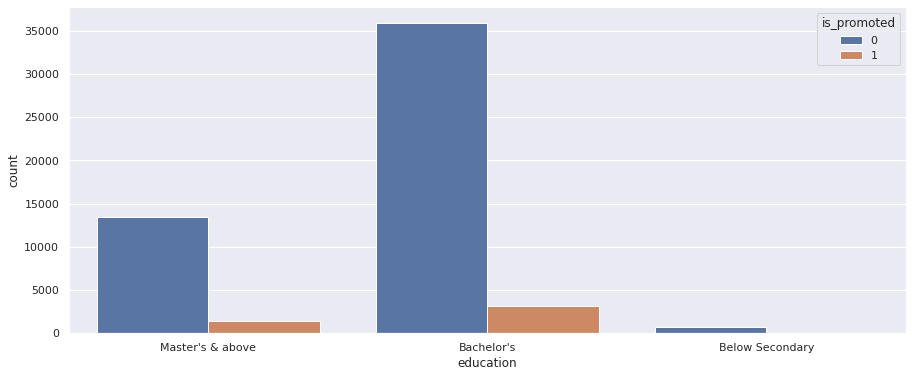

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='education', hue='is_promoted', data=df1)

**H3 Funcionarios com mais vellhores recebem mais promoção**

FALSE

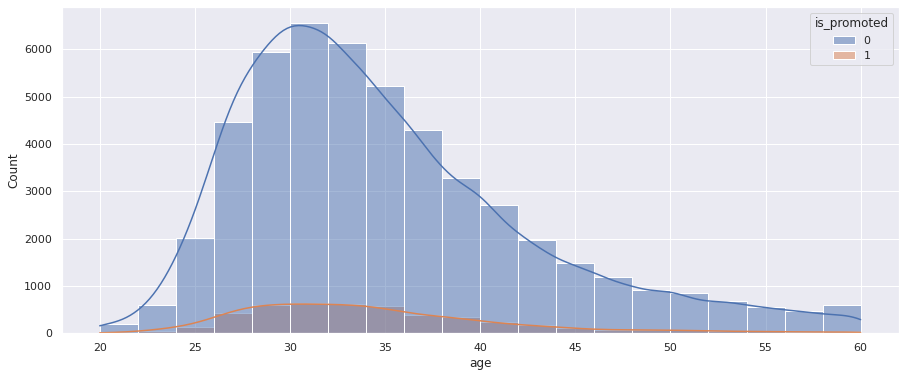

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(x='age', hue='is_promoted', data=df1, bins=20, kde=True)

**h4 - Quanto menor as notas nas avaliações, menos chances tem de ser promovidos**

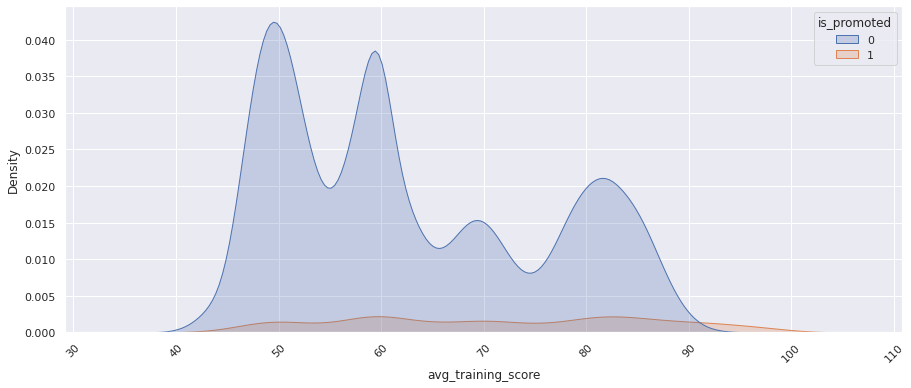

In [ ]:
plt.figure(figsize=(15,6))
sns.kdeplot(x='avg_training_score', hue='is_promoted', data=df1, shade=True)
plt.xticks(rotation=45);

### **4.1.5 Multivariate Analysis**

**NUMERICAL**

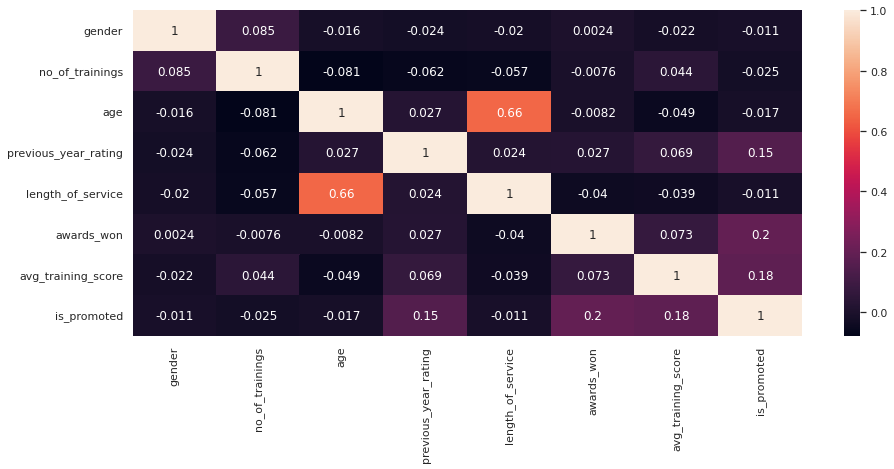

In [ ]:
plt.figure(figsize=(15,6))
correlation = df_num.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

**CATEGORICAL**

Cramer's V statistic allows to understand correlation between two categorical features in one data set. 

**It is calculated as:**

**Cramer’s V = √(X2/n) / min(c-1, r-1)**

where:

**X2:** The Chi-square statistic

**n:** Total sample size

**r:** Number of rows

**c:** Number of columns


In [ ]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
a = df_cat

a1 = cramers_v(pd.crosstab(a['department'], a["department"]).to_numpy())
a2 = cramers_v(pd.crosstab(a['department'], a["region"]).to_numpy())
a3 = cramers_v(pd.crosstab(a['department'], a["education"]).to_numpy())
a4 = cramers_v(pd.crosstab(a['department'], a["recruitment_channel"]).to_numpy())

a5 = cramers_v(pd.crosstab(a['region'], a["department"]).to_numpy())
a6 = cramers_v(pd.crosstab(a['region'], a["region"]).to_numpy())
a7 = cramers_v(pd.crosstab(a['region'], a["education"]).to_numpy())
a8 = cramers_v(pd.crosstab(a['region'], a["recruitment_channel"]).to_numpy())

a9 = cramers_v(pd.crosstab(a['education'], a["department"]).to_numpy())
a10 = cramers_v(pd.crosstab(a['education'], a["region"]).to_numpy())
a11 = cramers_v(pd.crosstab(a['education'], a["education"]).to_numpy())
a12 = cramers_v(pd.crosstab(a['education'], a["recruitment_channel"]).to_numpy())


a13 = cramers_v(pd.crosstab(a['recruitment_channel'], a["department"]).to_numpy())
a14 = cramers_v(pd.crosstab(a['recruitment_channel'], a["region"]).to_numpy())
a15 = cramers_v(pd.crosstab(a['recruitment_channel'], a["education"]).to_numpy())
a16 = cramers_v(pd.crosstab(a['recruitment_channel'], a["recruitment_channel"]).to_numpy())

# Final dataset
d = pd.DataFrame( {'department': [a1, a2, a3, a4],
'region': [a5, a6, a7, a8],
'education': [a9, a10, a11, a12],
'recruitment_channel': [a13, a14, a15, a16] })
d = d.set_index( d.columns )

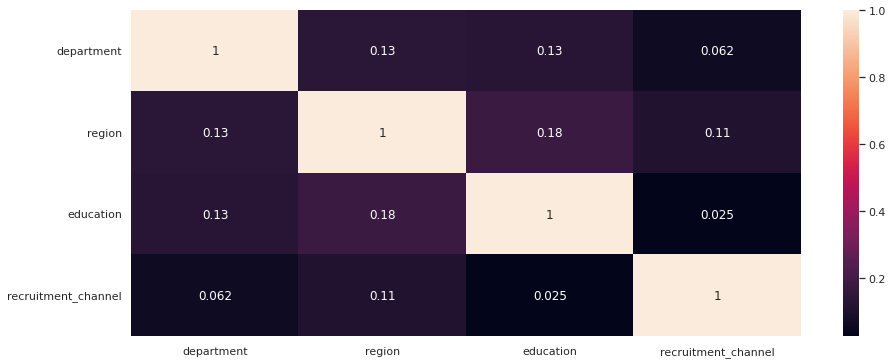

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap( d, annot=True);

# **5.0. DATA PREPARATION**

In [ ]:
dfcat = df_cat.copy()
dfnum = df_num.drop('is_promoted', axis=1)

### **5.0.1. One hot encoder**

In [ ]:
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['department',
                             'region',
                             'education',
                             'recruitment_channel'],use_cat_names=True)
# encode the categorical variables
dfcat = OHE.fit_transform(dfcat)

In [ ]:
df_all = pd.concat([dfnum, dfcat], axis= 1)

In [ ]:
X = df_all.copy()
y = df1['is_promoted']

In [ ]:
def log_transform(col):
  return np.log(col)

X['age'] = X['age'].apply(log_transform)
X['length_of_service'] = X['length_of_service'].apply(log_transform)
X['avg_training_score'] = X['avg_training_score'].apply(log_transform)

IndexError: ignored

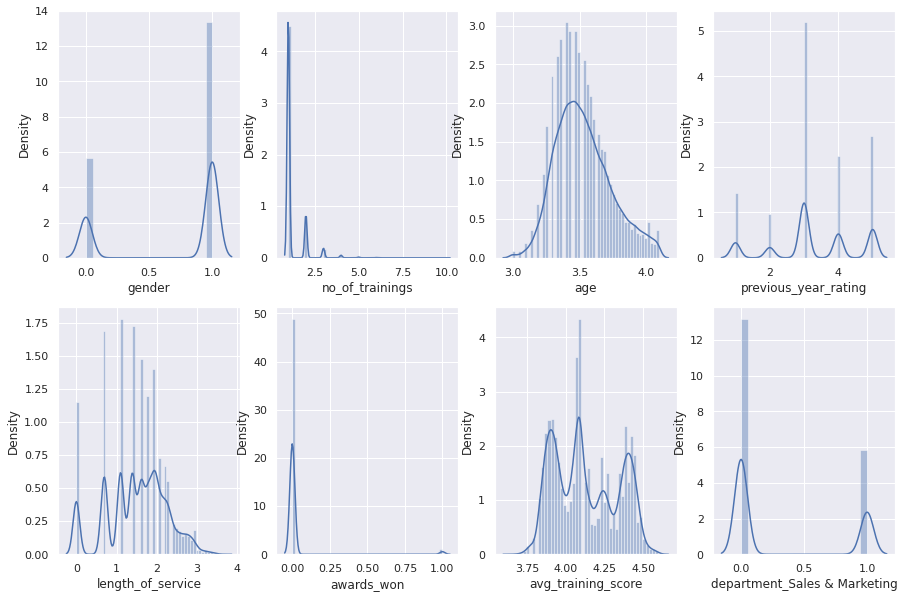

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for i, feature in enumerate(X):
    row = int(i/4)
    col = i%4
    sns.distplot(X.iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

### **5.0.2. Scaler**

In [ ]:
#put the values in the same scale.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = df_all.columns)

# **6.0. FEATURE SELECTION**

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.



### **6.0.1 Random Forest Regressor**

In [ ]:
#rf = RandomForestRegressor(n_estimators=100)
#rf.fit(X_train, y_train)

In [ ]:
def imp_df(column_names, importances):
  df = pd.DataFrame({'feature': column_names,
                     'feature_importance': importances}).sort_values('feature_importance', ascending = False).reset_index(drop = True)
  return df

In [ ]:
'''
def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df
'''


In [ ]:
#feat = drop_col_feat_imp(rf, X_train, y_train)

In [ ]:
#feat_15 = feat.head(15)

In [ ]:
#plt.figure(figsize=(15,6))
#sns.barplot(data=feat_15, y='feature', x='feature_importance');

In [ ]:
select_cols = ['avg_training_score', 'age', 'length_of_service','previous_year_rating', 'gender','no_of_trainings','awards_won']
X = X[select_cols]

# **SMOTE**

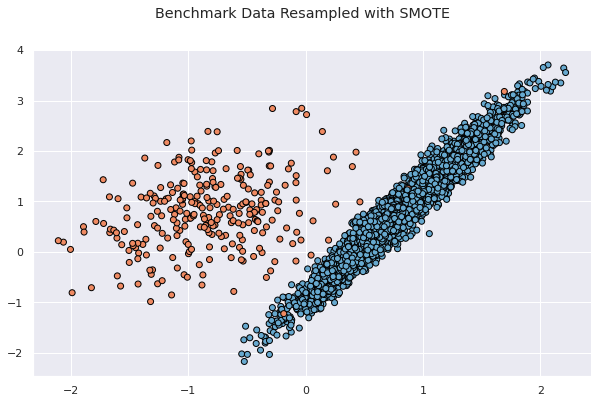

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.94],
                           class_sep=0.8, random_state=0)

colors = ['#ef8a62' if v == 0 else '#67a9cf' if v == 1 else '#f7f7f7' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass

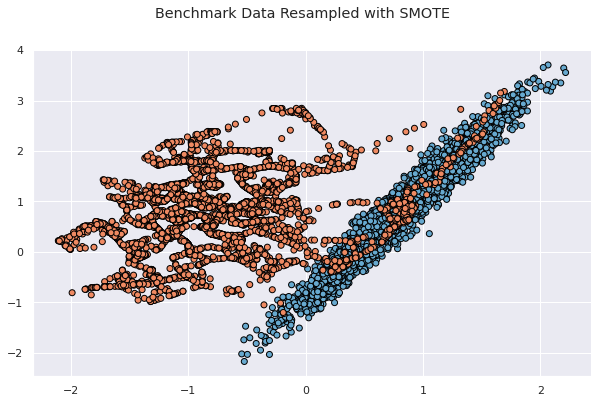

In [ ]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#67a9cf' if v == 1 else '#f7f7f7' for v in y_resampled]
plt.figure(figsize=(10,6))
sns.scatterplot(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE");

# **7.0. MACHINE LEARNING**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25)

In [ ]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_test)

In [ ]:
print('XGBoost : \n', classification_report(y_test, preds))
print('XGBoost Accuracy: ', accuracy_score(y_test, preds))

XGBoost : 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      1165
           1       0.92      1.00      0.96      1185

    accuracy                           0.96      2350
   macro avg       0.96      0.96      0.96      2350
weighted avg       0.96      0.96      0.96      2350

XGBoost Accuracy:  0.9578723404255319


In [ ]:
confusion_matrix(y_test, preds)

array([[1066,   99],
       [   0, 1185]])

In [ ]:
print('MAE:', mean_absolute_error(y_test, preds))
print('MSE:', mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))

MAE: 0.04212765957446808
MSE: 0.04212765957446808
RMSE: 0.20525023647847054
